# From PyCon talk
# Alon Nir - Network analysis in Python

### Small example

##### Create a simple NetworkX graph

In [56]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

<style>
.container{
    display: flex;
}
.col{
    flex: 1;
}
</style>

<div class="container">

<div class="col">
Column 1 Content
</div>

<div class="col">
Column 2 Content
</div>

</div>

In [ ]:
nx.from

![](pics/networkx-from-options.png)

In [152]:
g = nx.from_edgelist([
    (0, 1),
    (1, 2),
    (1, 0),
    (3, 0)
], create_using=nx.DiGraph())

In [153]:
node_attrs = {
    0: {'name': 'john'},
    1: {'name': 'karl'},
    2: {'name': 'tessa'},
}

nx.set_node_attributes(g, node_attrs)

In [154]:
g.nodes[0]

{'name': 'john'}

In [155]:
nx.get_node_attributes(g, 'name')

{0: 'john', 1: 'karl', 2: 'tessa'}

##### Visualise it!

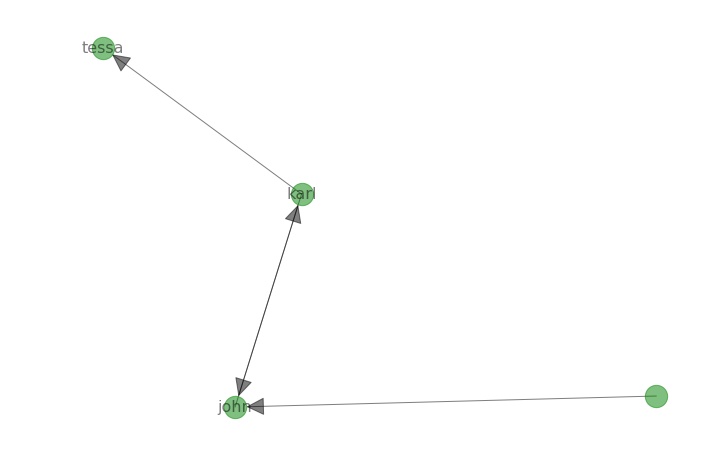

In [158]:
plt.figure(figsize=(12, 8))
nx.draw_networkx(
    g, 
    node_size=500, 
    font_size=16, 
    node_color='g', 
    alpha=.5,
    arrowsize=40,
    labels=nx.get_node_attributes(g, 'name'),
    pos=nx.spring_layout(g, k=1))
plt.gca().axis('off');

### Bigger example

##### Load some more data as Pandas dataframe

In [173]:
# data on co-authoring papers in astrophysics (Arxiv)
# (data from Kaggle https://www.kaggle.com/charlesxjyang/arxiv-astrophysics-collab)

df = pd.read_csv('data/ca-AstroPh.csv', skiprows=4)
df.columns = ['from_id', 'to_id']
df.head()

,from_id,to_id
0,84424,276
1,84424,1662
2,84424,5089
3,84424,6058
4,84424,6229


In [174]:
df.shape

(396160, 2)

##### Create a NetworkX graph from this

In [175]:
g = nx.from_pandas_edgelist(df, 'from_id', 'to_id')

In [68]:
print(f'Nodes: {nx.number_of_nodes(g)}')
print(f'Edges: {nx.number_of_edges(g)}')
print(f'Isolates: {nx.number_of_isolates(g)}')

Nodes: 18772
Edges: 198110
Isolates: 0


In [70]:
# this would be too much to draw! Would take a while too

# nx.draw_networkx(g, node_size=10, font_size=16, node_color='g', alpha=.5, pos=nx.spring_layout(g, k=1))

##### Take a subset of the graph

In [71]:
subset = list(g.nodes)[:100]
g_sub = g.subgraph(subset)

In [75]:
def draw(g, pos):
    plt.figure(figsize=(12, 8))
    nx.draw_networkx(g, node_size=500, font_size=16, node_color='g', alpha=.5, pos=pos)
    plt.gca().axis('off');

##### Visualise - circular

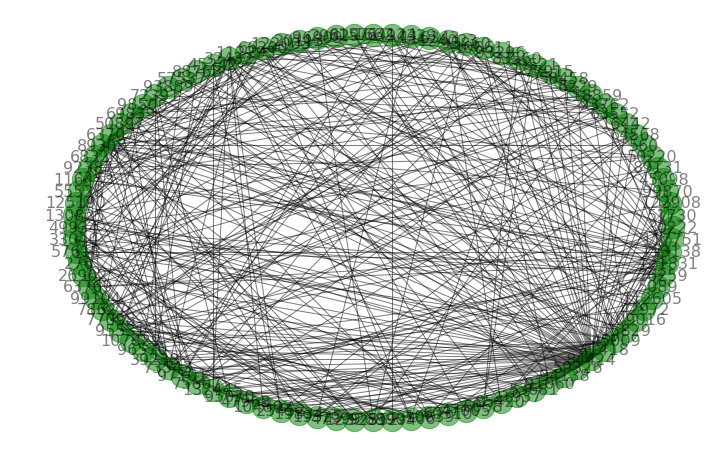

In [97]:
draw(g_sub, nx.circular_layout(g_sub))

##### Spring layout (Fruchterman-Reingold)

"...drawing graphs in an aesthetically-pleasing way. Their purpose is to position the nodes of a graph in two-dimensional or three-dimensional space so that all the edges are of more or less equal length and there are as few crossing edges as possible..."

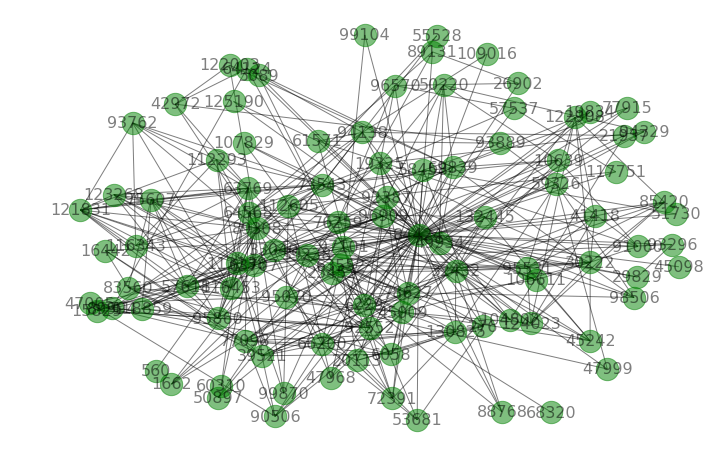

In [99]:
draw(g_sub, nx.spring_layout(g_sub, k=1))

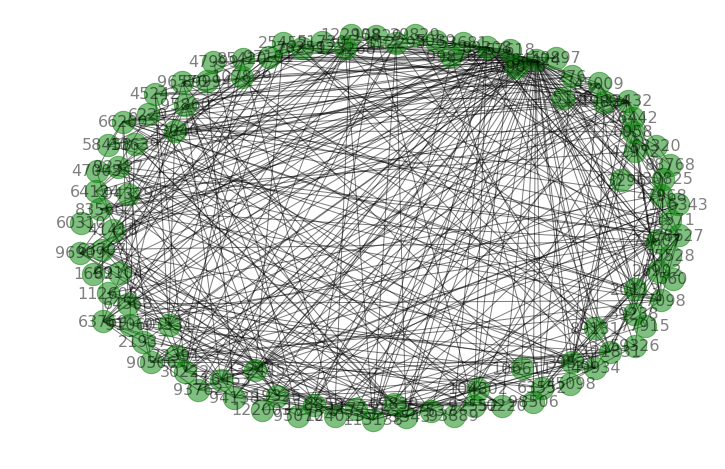

In [100]:
draw(g_sub, nx.spring_layout(g_sub, k=4))  # k controls how much to spread nodes apart

##### Kamada Kawai layout

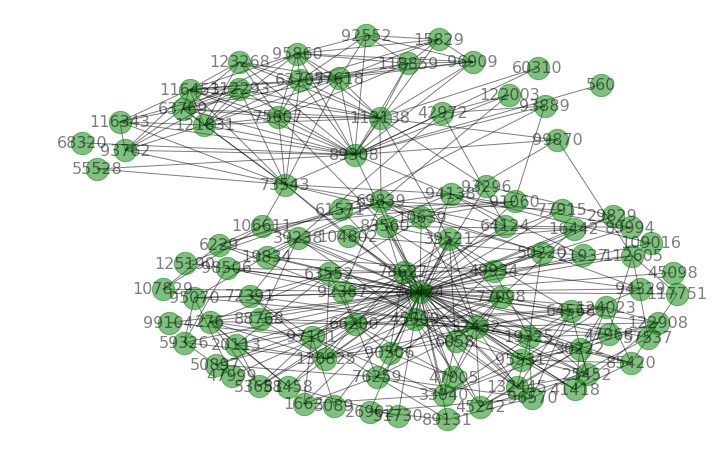

In [101]:
draw(g_sub, nx.kamada_kawai_layout(g_sub))

### Connected components

In [130]:
# import numpy as np
# random_nodes = np.random.choice(list(g.nodes), 500, replace=False)

# g_sub = g.subgraph(random_nodes)

ccs = list(nx.connected_components(g))

In [132]:
print(f'{len(ccs)} connected components!')

290 connected components!


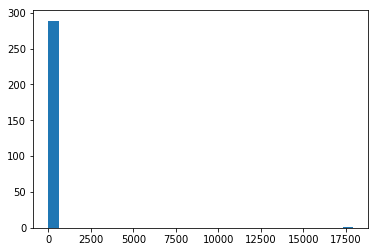

In [140]:
lenghts = list(map(len, ccs))
bars = plt.hist(lenghts, bins=30)

In [156]:
bars[0]

array([289.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.])

### Algorithms - community detection

The Girvan–Newman algorithm detects communities by **progressively removing edges from the original graph. The algorithm removes the “most valuable” edge, traditionally the edge with the highest betweenness centrality**, at each step. As the graph breaks down into pieces, the tightly knit community structure is exposed and the result can be depicted as a dendrogram

In [276]:
g_sub = g.subgraph(list(g.nodes)[130:160])

In [277]:
# returns a list of increasingly granular tuples of communities
# - i.e. first item splits the nodes into K communities (where K is number of connected components)
# - second item splits the nodes into K + 1 communites etc..
communities = list(nx.algorithms.community.centrality.girvan_newman(g_sub))

In [278]:
node2community = {node_id: i for i, community in enumerate(communities[5]) for node_id in community}

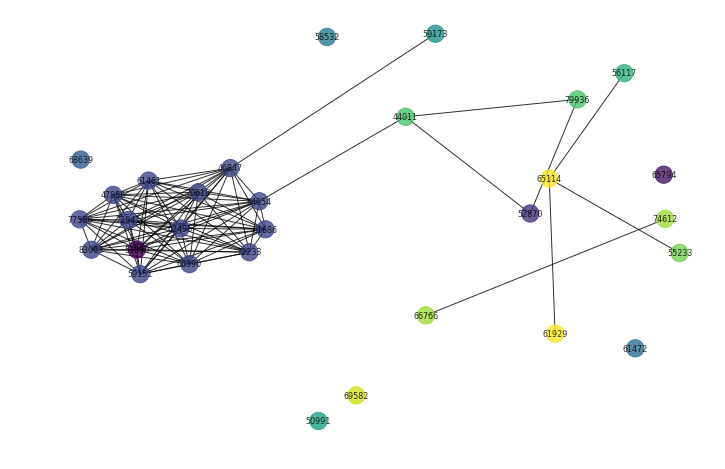

In [289]:
plt.figure(figsize=(12, 8))
nx.draw_networkx(
    g_sub, 
    node_size=300, 
    font_size=8, 
    alpha=.8, 
    pos=nx.spring_layout(g_sub, k=1), 
    node_color=[node2community[n] for n in g_sub.nodes]
)
plt.gca().axis('off');

##### Using package python-louvain (much faster)

In [291]:
import community

11


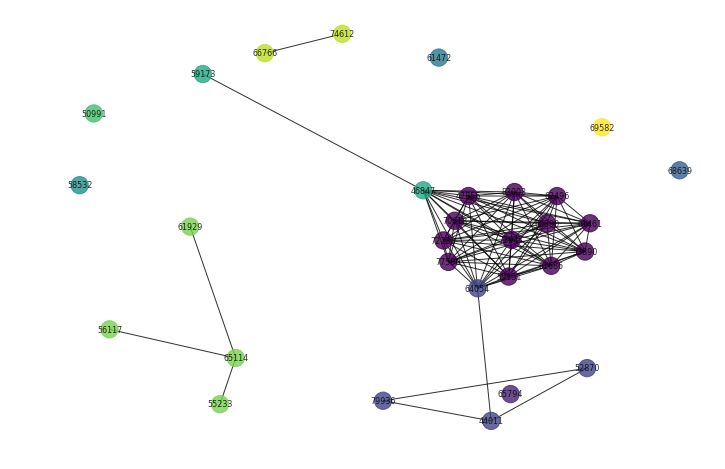

In [302]:
communities = community.best_partition(g_sub, resolution=.9)
print(len(set(communities.values())))

plt.figure(figsize=(12, 8))
nx.draw_networkx(
    g_sub, 
    node_size=300, 
    font_size=8, 
    alpha=.8, 
    pos=nx.spring_layout(g_sub, k=1), 
    node_color=[communities[n] for n in g_sub.nodes]
)
plt.gca().axis('off');

### PageRank

In [306]:
g_sub = g.subgraph(list(g.nodes)[0:30])

In [307]:
pr = nx.pagerank(g_sub)

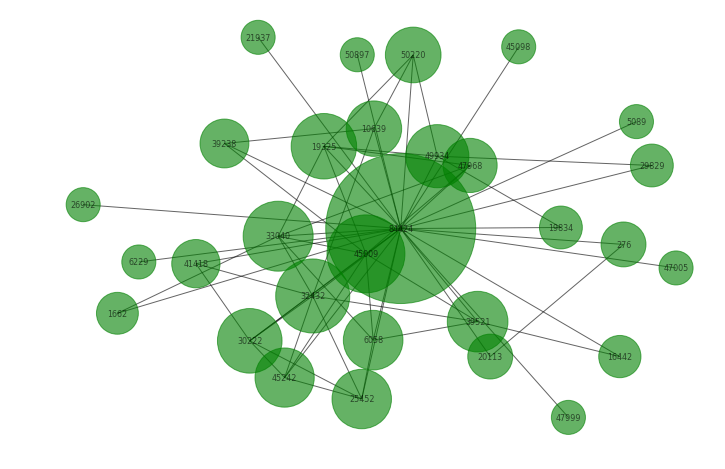

In [311]:
plt.figure(figsize=(12, 8))
nx.draw_networkx(
    g_sub, 
    node_size=[100000*pr[n] for n in g_sub.nodes()], 
    font_size=8, 
    alpha=.6, 
    pos=nx.spring_layout(g_sub, k=1), 
    node_color='g'
)
plt.gca().axis('off');

### Final notes

- Watch out for correct version of documentation
- 